In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 960M (CNMeM is disabled, cuDNN not available)


In [2]:
batch_size = 128
nb_classes = 10 # 10 digits from 0 to 9

# input image dimensions
img_rows, img_cols = 28, 28

# data, shuffled and split between train & test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape data
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

print "X_train shape : ", X_train.shape
print X_train.shape[0], "train samples"
print X_test.shape[0], "test samples"

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print "One hot encoding : {}".format(Y_train[1, :])

X_train shape :  (60000, 1, 28, 28)
60000 train samples
10000 test samples
One hot encoding : [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


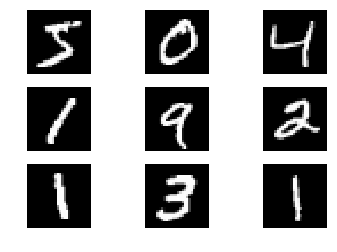

In [3]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i, 0], cmap='gray')
    plt.axis('off')

In [4]:
model = Sequential()

# Convolutional2D(number_filters, row_size, column_size, input_shape=(number_channels, img_row, img_col))

model.add(Convolution2D(32, 5, 5, input_shape=(1, img_rows, img_cols), border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 5, 5, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Convolution2D(128, 5, 5))
model.add(Activation('relu'))
model.add(Dropout(0.25))
          
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

/home/garvit/anaconda3/envs/python2/lib/python2.7/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
/home/garvit/anaconda3/envs/python2/lib/python2.7/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
/home/garvit/anaconda3/envs/python2/lib/python2.7/site-packages/keras/backend/theano_backend.py:1500: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')


# Training

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])

In [ ]:
nb_epoch = 64

model.fit(X_train, Y_train, batch_size = batch_size, nb_epoch =nb_epoch, show_accuracy = True, verbose = 1, validation_data = (X_test, Y_test))

score.evaluate(X_test, Y_test, show_accuracy = True, verbose = 0)
print 'Test Score : ', score[0]
print 'Test accuracy : ', score[1]

/home/garvit/anaconda3/envs/python2/lib/python2.7/site-packages/keras/models.py:610: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Train on 60000 samples, validate on 10000 samples
Epoch 1/64
60000/60000 [==============================] - 52s - loss: 0.3224 - val_loss: 0.0582